# Project 1
With the aid of Bagehot's contributions (The Only Game in Town Links to an external site.), and Copeland & Galai's model (Information Effects on the Bid-Ask Spread) demonstrated how, even without transaction costs, a spread would exist. This led us to maximize the market maker's profit function in terms of a Bid & Ask price.

this is a test

### <font color="darkblue"> Parameters</font>

1. **Stock Price Follows a Erlang Distribution:**
   - Distribution: $
   P \sim \text{Erlang}(K= 60,\lambda = 3)$

   - $\Pi_{LB}(S) = 0.5 - 0.08(S)$  where $\Pi_{LB} : [0, 0.5]$
  
   - $\Pi_{LS}(S) = 0.5 - 0.08(S)$  where $\Pi_{LS} : [0, 0.5]$

   - $P_0 = 19.90$

   - $P:[10,33]$

bid=16.56 ask =23


$\begin{aligned}Max: \Pi_{Ls}(A-P_0)(A-P_0) +  \Pi_{LB}(P_0-B)(P_0-B) -\Pi_I[\int_{10}^B(B-P)f(P)dP+\int_{A}^{33}(P-A)f(P)dP]
\end{aligned}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import erlang
from scipy.integrate import quad

In [7]:
# Parameters for Erlang distribution
K = 60
lambda_ = 3
P0 = 19.90
P_min = 10
P_max = 33

# Generate stock prices
prices = np.linspace(10, 33, 1000)
stock_prices = erlang.pdf(prices, K, scale=1/lambda_)


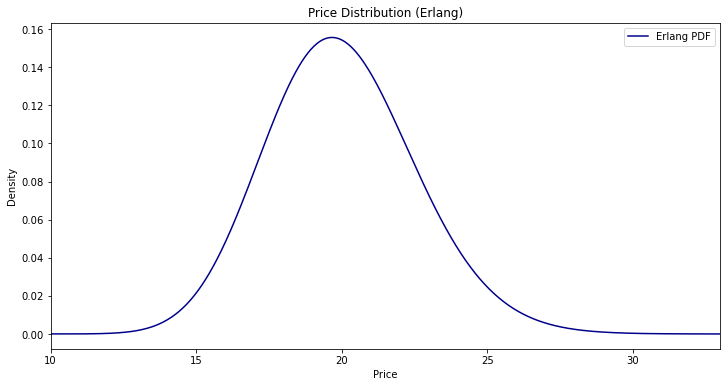

In [16]:
# Generar una muestra aleatoria de precios a partir de la distribución Erlang
P = erlang.rvs(K, scale=1/lambda_, size=1000)

# Crear un array de valores para graficar la función de densidad de probabilidad (PDF)
x = np.linspace(0, 33, 1000)

# Definir la función de densidad de probabilidad (PDF) para la distribución Erlang
y = erlang.pdf(x, K, scale=1/lambda_)

# Graficar la distribución de precios utilizando la distribución Erlang
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='darkblue', label='Erlang PDF')
plt.title('Price Distribution (Erlang)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(10, 33)
plt.grid(False)
plt.legend()
# plt.show()

In [17]:
def Pi_LB(S):
    return 0.5 - 0.08 * S

def Pi_LS(S):
    return 0.5 - 0.08 * S

def expected_revenue(A, B):
    term1 = Pi_LS(A - P0) * (A - P0)
    term2 = Pi_LB(P0 - B) * (P0 - B)
    term3 = Pi_I * (quad(lambda P: (B - P) * erlang.pdf(P, K, scale=1/lambda_), P_min, B)[0] +
                    quad(lambda P: (P - A) * erlang.pdf(P, K, scale=1/lambda_), A, P_max)[0])
    return term1 + term2 - term3


In [18]:
# Scenario 1: All trades are liquidity trades
Pi_LB_const = 0.5
Pi_LS_const = 0.5

revenue_liquidity_adjusted = 0.5 * (x + x)

# Scenario 2: 40% chance of informed trade
Pi_I = 0.4
revenue_informed_adjusted = 0.4 * (0.5 + 0.5)* x

# Scenario 3: Considering Pi_I, Pi_LB(S), and Pi_LS(S)
revenue_variable = Pi_I * prices + (1 - Pi_I) * (Pi_LB(prices) * prices + Pi_LS(prices) * prices)


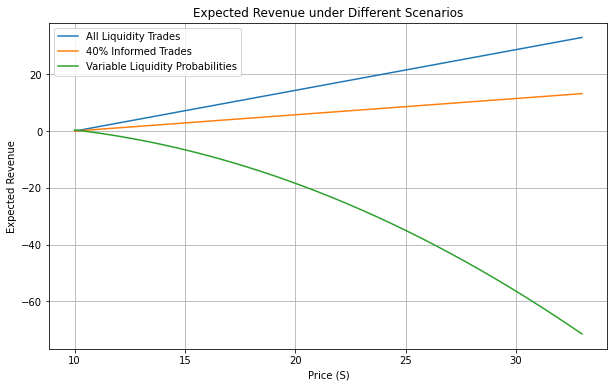

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(prices, revenue_liquidity_adjusted, label='All Liquidity Trades')
plt.plot(prices, revenue_informed_adjusted, label='40% Informed Trades')
plt.plot(prices, revenue_variable, label='Variable Liquidity Probabilities')
plt.xlabel('Price (S)')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue under Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Grid search for optimal A and B
A_values = np.linspace(P0, P_max, 100)
B_values = np.linspace(P_min, P0, 100)
max_revenue = -np.inf
optimal_A = P0
optimal_B = P0

for A in A_values:
    for B in B_values:
        revenue = expected_revenue(A, B)
        if revenue > max_revenue:
            max_revenue = revenue
            optimal_A = A
            optimal_B = B

print(f'Optimal Ask Price (A): {optimal_A}')
print(f'Optimal Bid Price (B): {optimal_B}')


Optimal Ask Price (A): 23.34040404040404
Optimal Bid Price (B): 16.6
